In [23]:
%%capture
pip install plotly pandas statsmodels kaleido scipy nbformat jinja2

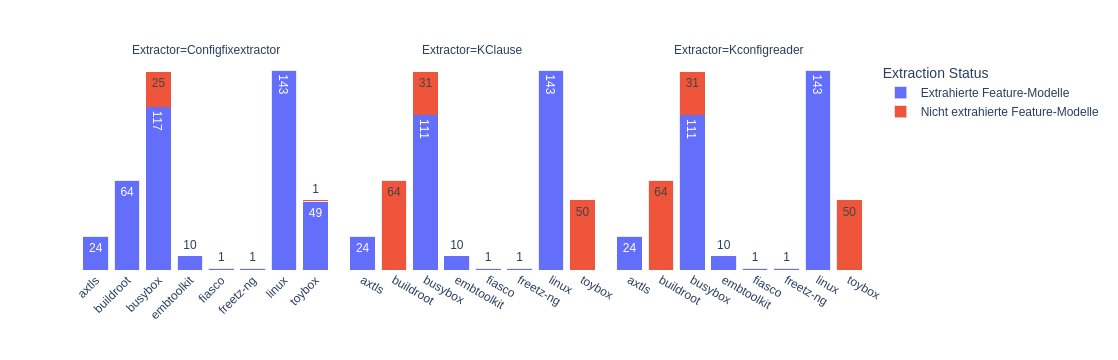

In [78]:
import pandas as pd
import plotly.express as px

#Für welche Revisionen unterschiedlicher System können Feature-Modell-Formeln extrahiert, transformiert und analysiert werden?

file_configfixextractor = '/home/rami/configFixextractor/kconfig/output.csv'
file_kmax = '/home/rami/kmax/kconfig/output.csv'
file_Kconfigreader = '/home/rami/Kconfigreader/kconfig/output.csv'

df_configfixextractor = pd.read_csv(file_configfixextractor)
df_kmax = pd.read_csv(file_kmax)
df_Kconfigreader = pd.read_csv(file_Kconfigreader)


df_configfixextractor_filtered = df_configfixextractor[['system', 'revision', 'model-file']].copy()
df_configfixextractor_filtered['Extractor'] = 'Configfixextractor'

df_kmax_filtered = df_kmax[['system', 'revision', 'model-file']].copy()
df_kmax_filtered['Extractor'] = 'KClause'

df_Kconfigreader_filtered = df_Kconfigreader[['system', 'revision', 'model-file']].copy()
df_Kconfigreader_filtered['Extractor'] = 'Kconfigreader'

# Kombiniere alle DataFrames
df_combined = pd.concat([df_configfixextractor_filtered, df_kmax_filtered, df_Kconfigreader_filtered], ignore_index=True)

# Status basierend auf 'model-file'
df_combined['status'] = df_combined.apply(
    lambda row: 'Extrahierte Feature-Modelle' if pd.notna(row['model-file']) else 'Nicht extrahierte Feature-Modelle',
    axis=1
)


df_summary_combined = df_combined.groupby(['system', 'status', 'Extractor']).size().reset_index(name='count')


fig_combined = px.bar(
    df_summary_combined,
    x='system',
    y='count',
    color='status',
    facet_col='Extractor',  
    title='',
    labels={'count': '', 'system': '', 'status': 'Status'},
    text='count',  
)


fig_combined.update_layout(
    xaxis_title='',
    legend_title='Extraction Status',
    xaxis_tickangle=-45,
    barmode='stack',
    plot_bgcolor='white',
    paper_bgcolor='white',
    yaxis=dict(
        showticklabels=False,  
        showgrid=False         
    ),
)


fig_combined.show()


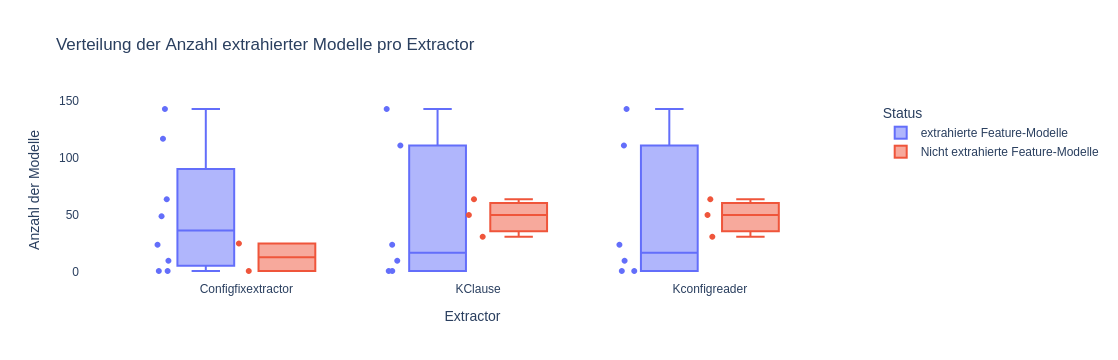

In [28]:
import pandas as pd
import plotly.express as px

# Einlesen der drei CSV-Dateien
file_configfixextractor = '/home/rami/configFixextractor/kconfig/output.csv'
file_kmax = '/home/rami/kmax/kconfig/output.csv'
file_Kconfigreader = '/home/rami/Kconfigreader/kconfig/output.csv'

df_configfixextractor = pd.read_csv(file_configfixextractor)
df_kmax = pd.read_csv(file_kmax)
df_Kconfigreader = pd.read_csv(file_Kconfigreader)

# Relevante Spalten auswählen und 'Extractor' Spalte hinzufügen
df_configfixextractor_filtered = df_configfixextractor[['system', 'revision', 'model-file']].copy()
df_configfixextractor_filtered['Extractor'] = 'Configfixextractor'

df_kmax_filtered = df_kmax[['system', 'revision', 'model-file']].copy()
df_kmax_filtered['Extractor'] = 'KClause'

df_Kconfigreader_filtered = df_Kconfigreader[['system', 'revision', 'model-file']].copy()
df_Kconfigreader_filtered['Extractor'] = 'Kconfigreader'

# Kombiniere alle DataFrames
df_combined = pd.concat([df_configfixextractor_filtered, df_kmax_filtered, df_Kconfigreader_filtered], ignore_index=True)

# Status basierend auf 'model-file'
df_combined['status'] = df_combined.apply(
    lambda row: 'extrahierte Feature-Modelle' if pd.notna(row['model-file']) else 'Nicht extrahierte Feature-Modelle',
    axis=1
)

# Gruppieren der Daten nach 'system', 'Extractor' und 'status' und Anzahl berechnen
df_summary_combined = df_combined.groupby(['system', 'Extractor', 'status']).size().reset_index(name='count')

# Boxplot erstellen
fig = px.box(
    df_summary_combined,
    x='Extractor',
    y='count',
    color='status',
    title='Verteilung der Anzahl extrahierter Modelle pro Extractor',
    labels={'count': 'Anzahl', 'Extractor': 'Extractor', 'status': 'Status'},
    points='all'  # Zeigt die zugrundeliegenden Datenpunkte
)

# Layout-Anpassungen
fig.update_layout(
    xaxis_title='Extractor',
    yaxis_title='Anzahl der Modelle',
    legend_title='Status',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Boxplot anzeigen
fig.show()


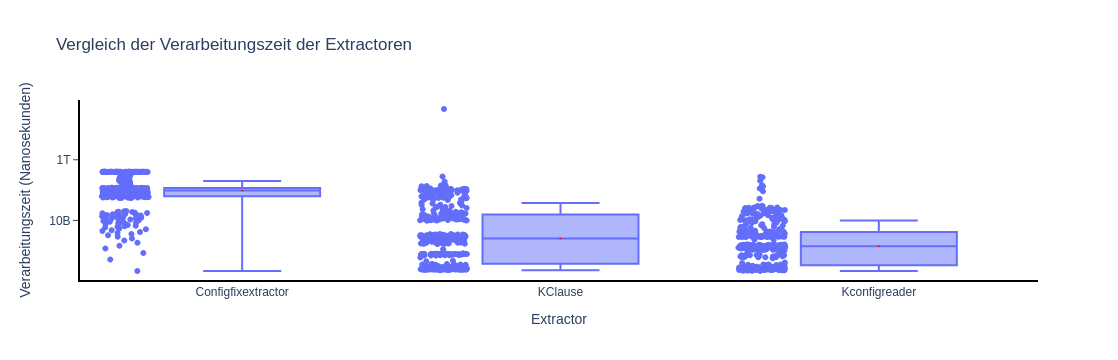

In [54]:
import pandas as pd
import plotly.express as px

# Einlesen der CSV-Dateien
file_configfixextractor = '/home/rami/configFixextractor/kconfig/output.csv'
file_kmax = '/home/rami/kmax/kconfig/output.csv'
file_Kconfigreader = '/home/rami/Kconfigreader/kconfig/output.csv'

df_configfixextractor = pd.read_csv(file_configfixextractor)
df_kmax = pd.read_csv(file_kmax)
df_Kconfigreader = pd.read_csv(file_Kconfigreader)

# Daten vorverarbeiten
df_configfixextractor_filtered = df_configfixextractor[['system', 'revision', 'model-file', 'model-time']].copy()
df_configfixextractor_filtered['Extractor'] = 'Configfixextractor'

df_kmax_filtered = df_kmax[['system', 'revision', 'model-file', 'model-time']].copy()
df_kmax_filtered['Extractor'] = 'KClause'

df_Kconfigreader_filtered = df_Kconfigreader[['system', 'revision', 'model-file', 'model-time']].copy()
df_Kconfigreader_filtered['Extractor'] = 'Kconfigreader'

# Kombinieren der Daten
df_combined = pd.concat([df_configfixextractor_filtered, df_kmax_filtered, df_Kconfigreader_filtered], ignore_index=True)

# Konvertiere 'model-time' in numerische Werte und entferne Null- oder NaN-Werte
df_combined['model-time'] = pd.to_numeric(df_combined['model-time'], errors='coerce')
df_combined = df_combined[df_combined['model-time'] > 0]

# Boxplot erstellen
fig = px.box(
    df_combined,
    x='Extractor',
    y='model-time',
    title='Vergleich der Verarbeitungszeit der Extractoren',
    labels={'model-time': 'Verarbeitungszeit (Nanosekunden)', 'Extractor': 'Extractor'},
    points='all'  # Datenpunkte anzeigen
)

# Hinzufügen von durchgestrichenen Linien für die Medianwerte
for extractor in df_combined['Extractor'].unique():
    # Medianwert für den aktuellen Extractor berechnen
    median_value = df_combined[df_combined['Extractor'] == extractor]['model-time'].median()
    
    # Hinzufügen einer durchgestrichenen Linie auf der Höhe des Medians
    fig.add_shape(
        type='line',
        x0=extractor,
        x1=extractor,
        y0=median_value * 0.95,
        y1=median_value * 1.05,
        line=dict(color='red', dash='dash', width=2),
        xref='x',
        yref='y'
    )

# Layout-Anpassungen
fig.update_layout(
    yaxis=dict(
        type='log',  # Logarithmische Skala
        autorange=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        linewidth=2
    ),
    xaxis=dict(
        showline=True,
        linecolor='black',
        linewidth=2
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    boxmode='group'
)

# Diagramm anzeigen
fig.show()


In [2]:
file_configfixextractor = '/home/rami/torte/output/kconfig/busybox/1_5_1.csv'
file_configfixextractor = '/home/rami/torte/output/kconfig/busybox/1_5_1.csv'

def count_item_lines(file_path):
    try:
        with open(file_path, 'r') as file:
            # Zeilen zählen, die mit "#item" beginnen
            count = sum(1 for line in file if line.startswith('#item'))
        return count
    except FileNotFoundError:
        print(f"Die Datei {file_path} wurde nicht gefunden.")
        return 0
    except Exception as e:
        print(f"Ein Fehler ist aufgetreten: {e}")
        return 0

# Anzahl der #item-Zeilen abrufen
item_count = count_item_lines(file_configfixextractor)
print(f"Anzahl der Zeilen, die mit '#item' beginnen: {item_count}")


Anzahl der Zeilen, die mit '#item' beginnen: 558
